# RADEON TWEETS PROJECT - Jorge Medina

## What is Radeon?
Radeon is a division of AMD, a microchip company, that create video cards for computers.

In [4]:
#Import all the libraries needed
import pandas as pd
import numpy as np
import os

#Tweepy
import tweepy
from tweepy import OAuthHandler, Stream

#Textblob
from textblob import TextBlob

#nltk for the language processing
import nltk
from nltk.corpus import stopwords
import re
import networkx

#import collections
import collections

#Itertools
import itertools

#Visualization
import matplotlib.pyplot as plt


In [7]:
#Twitter Developer keys to access the twitter API
access_token = 
access_secret = 
consumer_key = 
consumer_secret = 

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

twitter_api = tweepy.API(auth)

# Extracting tweets from the twitter api

In [222]:
#Create the search word and filter out the retweets
search = 'radeon-filter:retweets'

#Use tweepy to collect the tweets using the search word
#Search for tweets about radeon 
tweets = tweepy.Cursor(twitter_api.search,
                      q=search,
                       since='2020-05-21',
                      lang = "en").items(1000)

#The data being pulled from the tweet will be the text, username, source, retweet count, and user location
tweet_info = [[tweet.text,tweet.user.screen_name,
               tweet.source,tweet.retweet_count,tweet.user.location] for tweet in tweets]

#show how many tweets are in all_tweets
#sometimes the number of tweets did not go up to the amount stated
print(tweet_info[:10])

[['AMD Radeon RX 6000 mobile GPU adopted by\xa0Nvidia https://t.co/veFGanVVkj', 'ExBulletinUk', 'WordPress.com', 0, 'UK'], ['Delta Force Black Hawk Down Laptop/Desktop Computer Game.\nPRICE : ksh 50.00\n\nMinimum Graphics Requirements: COMPATI… https://t.co/1kFaygteyT', 'XGAMERtech', 'TweetDeck', 0, 'Nairobi,Kenya'], ['ANY PRODUCTS LISTED ARE FROM AMAZON!\nMSI Radeon RX 6700 XT Gaming X Graphics Card 12GB 192-Bit ...… https://t.co/gTKrrqXRXt', 'king_papa_papa', 'kingpapa', 0, 'Chicago, IL'], ['AMD Radeon RX 6000 mobile GPUs are here to take on Nvidia Logos for AMD Radeon and AMD\xa0Ryzen https://t.co/ZKM4wsXLIb', 'AcerboLivio', 'WordPress.com', 0, 'Nice, France'], ['AMD Radeon RX 6000 mobile GPU competes with Nvidia https://t.co/YNEfSXHAZy', 'JRMBelgium', 'dlvr.it', 0, 'Belgium'], ['Ebuyer\u200b.com: PowerColor Radeon RX 6700 XT 12GB Hellhound Graphics Card\n🔗 https://t.co/xrGPk6PWGV\n💸 £719.99 as of 🕒… https://t.co/rVPs2MBLjG', 'PartAlert', 'PartAlert', 0, '~recursiveGecko'], ['Steam\

This website helped me figure out what information i can pull when extracting tweets.
https://towardsdatascience.com/how-to-scrape-more-information-from-tweets-on-twitter-44fd540b8a1f#a760


In [223]:
"""TweetsDF was created to have certain data available for further analysis in the future.
I found it easier to pull the data once from twitter and hold it in a data frame.
Lets pull the tweets from TweetsDF to analyze the words used in the tweets."""


#the list of tweets needs to be made into a dataframe
Tweetsdf = pd.DataFrame(tweet_info,columns = ['Tweet','Username','Source','Retweet Count','Location'])
Tweetsdf.head()

,Tweet,Username,Source,Retweet Count,Location
0,AMD Radeon RX 6000 mobile GPU adopted by Nvidi...,ExBulletinUk,WordPress.com,0,UK
1,Delta Force Black Hawk Down Laptop/Desktop Com...,XGAMERtech,TweetDeck,0,"Nairobi,Kenya"
2,ANY PRODUCTS LISTED ARE FROM AMAZON!\nMSI Rade...,king_papa_papa,kingpapa,0,"Chicago, IL"
3,AMD Radeon RX 6000 mobile GPUs are here to tak...,AcerboLivio,WordPress.com,0,"Nice, France"
4,AMD Radeon RX 6000 mobile GPU competes with Nv...,JRMBelgium,dlvr.it,0,Belgium


In [224]:
#turn the tweets from Tweetsdf into a list
Tweettxt = Tweetsdf['Tweet'].tolist()
Tweettxt[:10]

['AMD Radeon RX 6000 mobile GPU adopted by\xa0Nvidia https://t.co/veFGanVVkj',
 'Delta Force Black Hawk Down Laptop/Desktop Computer Game.\nPRICE : ksh 50.00\n\nMinimum Graphics Requirements: COMPATI… https://t.co/1kFaygteyT',
 'ANY PRODUCTS LISTED ARE FROM AMAZON!\nMSI Radeon RX 6700 XT Gaming X Graphics Card 12GB 192-Bit ...… https://t.co/gTKrrqXRXt',
 'AMD Radeon RX 6000 mobile GPUs are here to take on Nvidia Logos for AMD Radeon and AMD\xa0Ryzen https://t.co/ZKM4wsXLIb',
 'AMD Radeon RX 6000 mobile GPU competes with Nvidia https://t.co/YNEfSXHAZy',
 'Ebuyer\u200b.com: PowerColor Radeon RX 6700 XT 12GB Hellhound Graphics Card\n🔗 https://t.co/xrGPk6PWGV\n💸 £719.99 as of 🕒… https://t.co/rVPs2MBLjG',
 'Steam\nDirectX\nRadeon',
 'I need some RETWEETS so this can reach the right people.\n\n@AMD @AMDRyzen @AMDGaming @NVIDIAGeForce @NVIDIAGFN… https://t.co/Cs8ewxE4Vi',
 'AMD Radeon RX 6000 cell GPUs are right here to tackle Nvidia\nhttps://t.co/50Oe5jScAm...\nhttps://t.co/xxjHNeqHw9',
 'AM

# Removing the URL from the tweets and Cleaning

In [225]:
#This function will remove the url from the tweets
#Reference:CISD43_Text_Mining_Twitter_Example2
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


# call the function to remove the url from the list of tweets
NoUrlTwt = [remove_url(tweet) for tweet in Tweettxt]
NoUrlTwt[:10]

['AMD Radeon RX 6000 mobile GPU adopted byNvidia',
 'Delta Force Black Hawk Down LaptopDesktop Computer GamePRICE ksh 5000Minimum Graphics Requirements COMPATI',
 'ANY PRODUCTS LISTED ARE FROM AMAZONMSI Radeon RX 6700 XT Gaming X Graphics Card 12GB 192Bit',
 'AMD Radeon RX 6000 mobile GPUs are here to take on Nvidia Logos for AMD Radeon and AMDRyzen',
 'AMD Radeon RX 6000 mobile GPU competes with Nvidia',
 'Ebuyercom PowerColor Radeon RX 6700 XT 12GB Hellhound Graphics Card 71999 as of',
 'SteamDirectXRadeon',
 'I need some RETWEETS so this can reach the right peopleAMD AMDRyzen AMDGaming NVIDIAGeForce NVIDIAGFN',
 'AMD Radeon RX 6000 cell GPUs are right here to tackle Nvidia',
 'AMD Radeon RX 6000 mobile GPUs are here to take on Nvidia']

In [226]:
#split the list of tweets into a list of lower case words
listwords = [tweet.lower().split() for tweet in NoUrlTwt]

#get a count of the words
word_count = list(itertools.chain(*listwords))
word_count = collections.Counter(word_count)

#print the top 15 words
word_count.most_common(15)

[('radeon', 851),
 ('rx', 576),
 ('xt', 420),
 ('gaming', 373),
 ('amd', 334),
 ('graphics', 323),
 ('card', 271),
 ('amazon', 271),
 ('6700', 248),
 ('oc', 190),
 ('in', 173),
 ('to', 135),
 ('i', 133),
 ('asus', 125),
 ('stock', 125)]

Radeon will need to be dropped since it was a search word. There will also be more terms that will need to be dropped because they are related to the search word. rx, xt, and amd will also be dropped.

rx - part of the video card name

xt - part of the video card name

amd - the company that makes radeon

radeon - subdivision of amd and search word

Stop words will also need to be dropped to clean up the list of words.

In [227]:
"""        REMOVE STOP WORDS + SEARCH RELATED TERMS        """

#clean_list1 - used to remove the stop words
#clean_list2 - used to remove the related terms

"""                       STOP WORDS                     """
#hold the stop words in a variable
stop_words = set(stopwords.words('english'))

#create a variable that holds the list of words without the stop words
clean_list1 = [[word for word in listwords if not word in stop_words]
               for listwords in listwords]


"""                   SEARCH RELATED TERMS                  """
#make a variable with the collection words
collection_words = ['radeon','rx','xt','amd']

#create a list of words without the search words using clean_list1
clean_list2 = [[w for w in word if not w in collection_words]
                 for word in clean_list1]


"""                     WORD COUNTER                       """
#create the counter for the cleaned list
counted_words = list(itertools.chain(*clean_list2))
countwords  = collections.Counter(counted_words)
#display the counted words
countwords.most_common(15)

[('gaming', 373),
 ('graphics', 323),
 ('card', 271),
 ('amazon', 271),
 ('6700', 248),
 ('oc', 190),
 ('asus', 125),
 ('stock', 125),
 ('checker', 120),
 ('powercolor', 98),
 ('6900', 93),
 ('sold', 90),
 ('12g', 88),
 ('12gb', 86),
 ('gpu', 78)]

In [228]:
#Create a sorted dataframe from the counted words
T15df = pd.DataFrame(data = countwords.most_common(15),
                     columns = ['Word','Occurance']).sort_values(by = 'Occurance')

#show df
T15df

,Word,Occurance
14,gpu,78
13,12gb,86
12,12g,88
11,sold,90
10,6900,93
9,powercolor,98
8,checker,120
6,asus,125
7,stock,125
5,oc,190


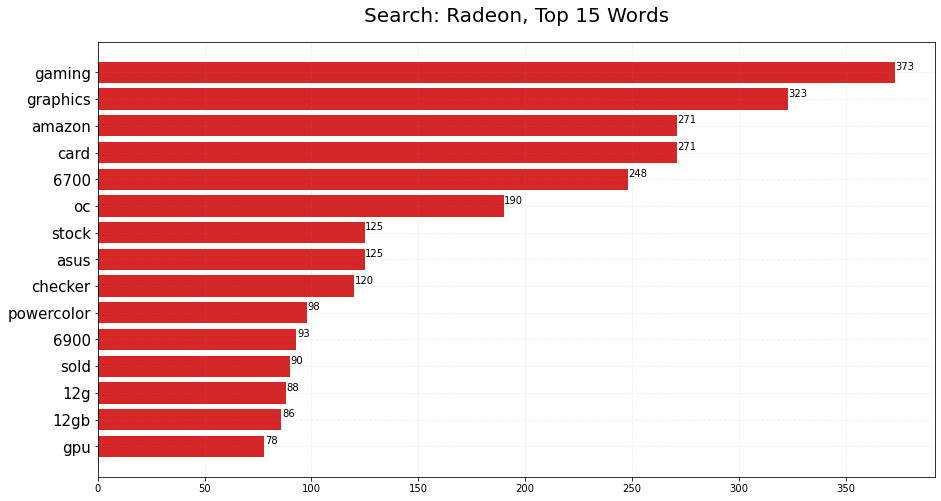

In [229]:
#plot and annotation reference:https://www.geeksforgeeks.org/matplotlib-pyplot-barh-function-in-python/

"""            PLOT              """
fig,ax = plt.subplots(figsize = (15,8))
ax.barh(y=T15df['Word'],width=T15df['Occurance'], color = 'tab:red')

#set the grid
ax.grid(b = True, color='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
#set title
ax.set_title('Search: Radeon, Top 15 Words',fontsize=20, pad = 20)
#set yt ick fontsize
plt.yticks(fontsize=15)

#set annotations for the bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
            str(round((i.get_width()), 2)),
            fontsize = 10)

plt.show()

The top word using the search term 'Radeon' is gaming. This will make sense since the Radeon line of video cards are meant for the PC gaming industry. Sometimes the word gaming could be used in the naming scheme of a radeon video card.

Going down further we can see graphics, card and 6700, these could be related to the naming of the video cards in production.

Following up is amazon, this term could be related to links for amazon and inventory status. I wonder how many users post about this?

# Search for amazon

I want to look into who is posting tweets with the word amazon. Since amazon is a market place and there is a shortage on video cards, it might be interesting to see what type of tweets hold the string amazon.

### What is the most popular source used when posting about amazon?
Looking at the source will tell us how the tweet is being posted. 

Do normal users really post links to the amazon market place?


In [230]:
#Create a dataframe that holds the the tweet, username and source
#you can drop location and rewteet count from Teetsdf
AmaTweet = Tweetsdf.drop(['Location','Retweet Count'], axis =1)

#make all of the tweets in the 'Tweet' column lower case
AmaTweet['Tweet'] = AmaTweet['Tweet'].str.lower()

#remove the url from all of the tweets using the remove_url() function
AmaTweet['Tweet'] = [remove_url(tweet) for tweet in AmaTweet['Tweet']]
AmaTweet.head()


,Tweet,Username,Source
0,amd radeon rx 6000 mobile gpu adopted bynvidia,ExBulletinUk,WordPress.com
1,delta force black hawk down laptopdesktop comp...,XGAMERtech,TweetDeck
2,any products listed are from amazonmsi radeon ...,king_papa_papa,kingpapa
3,amd radeon rx 6000 mobile gpus are here to tak...,AcerboLivio,WordPress.com
4,amd radeon rx 6000 mobile gpu competes with nv...,JRMBelgium,dlvr.it


The tweets inside of AmaTweet have now been cleaned from urls and the text has been converted into lower case. Now we can start to isolate the tweets that have the word amazon.

In [231]:
#look for tweets that hold the word amazon in AmaTweet dataframe
#reference link search inside a list:https://www.askpython.com/python/list/find-string-in-list-python
#reference link search inside df column:https://davidhamann.de/2017/06/26/pandas-select-elements-by-string/

#Create a data frame with only tweets that hold the string amazon
AmaMatch = AmaTweet.loc[AmaTweet['Tweet'].str.contains('amazon')]

#matches
AmaMatch

,Tweet,Username,Source
2,any products listed are from amazonmsi radeon ...,king_papa_papa,kingpapa
17,asus tuf gaming amd radeon rx 6800 oc edition ...,BotPCParts,Inventory Bot PC Parts
18,asus tuf gaming amd radeon rx 6800 oc edition ...,BotInventory,TheInventoryBot
20,asus radeon rx 6800 tuf oc in stock at retail ...,SnailMonitor,Snail Monitor
21,amazon asus radeon rx 6800 tuf gaming oclink a...,falcodrin,Stonky69
...,...,...,...
974,amazon gigabyte radeon rx 6700 xt gaming oclin...,falcodrin,Stonky69
975,amazon gigabyte radeon rx 6700 xt gaming oclin...,falcodrin,Stonky69
976,radeon rx 6700 xt gaming oc 12g graphics card ...,BotInventory,TheInventoryBot
977,radeon rx 6700 xt gaming oc 12g graphics card ...,BotPCParts,Inventory Bot PC Parts


AmaMatch now holds all the tweets that hold the string amazon. There are 240 rows, so there are 240 tweets that hold the string amazon.

# Most popular source used when posting about amazon?

In [232]:
#get the unique values used as source
AmaMatch['Source'].unique().tolist()

['kingpapa',
 'Inventory Bot PC Parts',
 'TheInventoryBot',
 'Snail Monitor',
 'Stonky69',
 'Stock Alert Bot.',
 'Zapier.com',
 'Oops Bot',
 'PC Drop',
 'Twitter Web App',
 'IFTTT',
 'StockPing',
 'PartAlert',
 'rx6000bot',
 'RestockTracker@GamerStockist',
 'amazonChollos',
 'Amacrawl_us',
 'TweetDeck']

Here are all the different sources that posted using the word amazon.

In [233]:
#create a dataframe with the percantage of the source
# the percantage will be based off of the 142 tweets that were isolated
AmaSource =pd.DataFrame(AmaMatch['Source'].value_counts('Source'))

#rename the columns, it is making the source as the index
AmaSource.reset_index(inplace=True)
AmaSource = AmaSource.rename(columns = {'index':'Source','Source':'Percentage'})

AmaSource



,Source,Percentage
0,TheInventoryBot,0.254167
1,Inventory Bot PC Parts,0.245833
2,Stonky69,0.179167
3,Stock Alert Bot.,0.062500
4,PC Drop,0.045833
5,Oops Bot,0.045833
6,IFTTT,0.041667
7,StockPing,0.020833
8,rx6000bot,0.020833
9,PartAlert,0.016667


We now have the percantage of sources for 240 tweets. Lets make a pie chart.

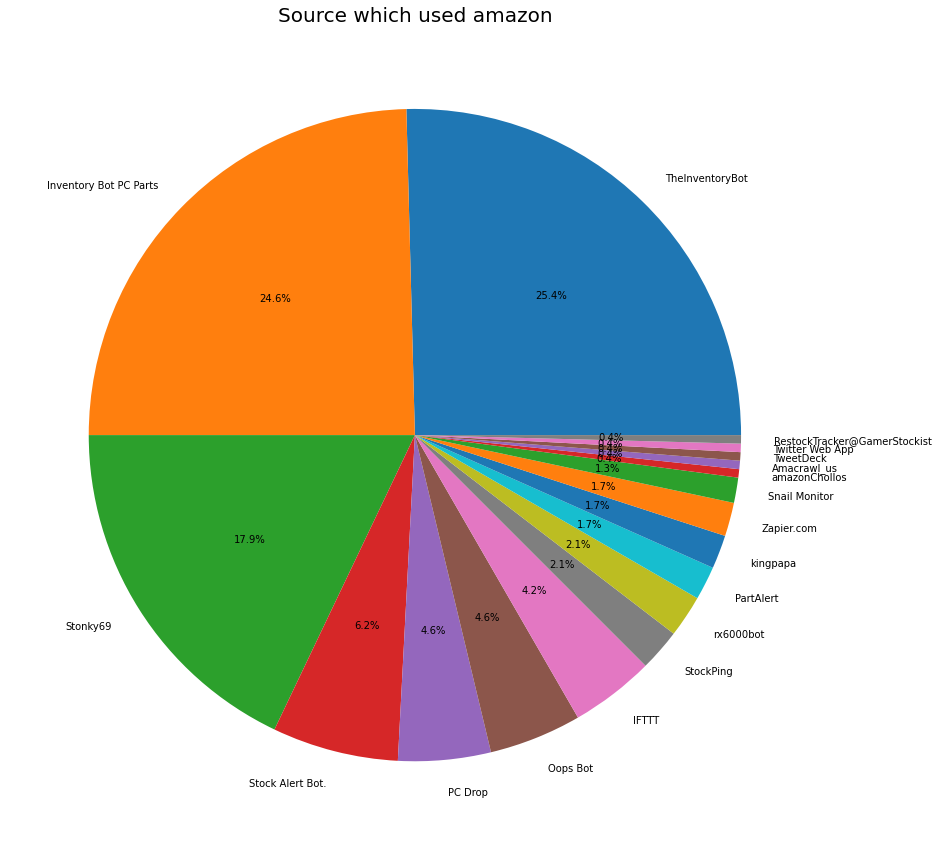

In [234]:
#plot using a pie chart
fig, ax = plt.subplots(figsize = (15,15))


ax.pie(AmaSource['Percentage'], labels = AmaSource['Source'],autopct='%1.1f%%')
ax.set_title('Source which used amazon', fontsize = 20)

plt.show()

For the most part, there are three main users that send tweets with the word amazon.
* TheInventoryBot
* Inventory Bot PC Parts
* Stonky69

Interesting to see the word bot pop up in the source. This leads me to beleive that most of the tweets that hold the string amazon are bots or automated twitter accounts. This might be usefull for restocking alerts since most of the video cards are difficult to find in stock at the moment.

# Sentiment Analysis on Tweets with Retweets

### If a tweet had a retweet, does that mean it has a positive polarity?

Lets do some sentiment analysis on tweets that got retweets.

In [235]:
#Create a data frame that contains only tweets that have been retweeted

ReTweetdf = Tweetsdf.drop(['Location','Source'], axis =1)

#make all of the tweets in the 'Tweet' column lower case
ReTweetdf['Tweet'] = ReTweetdf['Tweet'].str.lower()

#remove the url from all of the tweets using the remove_url() function
ReTweetdf['Tweet'] = [remove_url(tweet) for tweet in ReTweetdf['Tweet']]
ReTweetdf.head()


,Tweet,Username,Retweet Count
0,amd radeon rx 6000 mobile gpu adopted bynvidia,ExBulletinUk,0
1,delta force black hawk down laptopdesktop comp...,XGAMERtech,0
2,any products listed are from amazonmsi radeon ...,king_papa_papa,0
3,amd radeon rx 6000 mobile gpus are here to tak...,AcerboLivio,0
4,amd radeon rx 6000 mobile gpu competes with nv...,JRMBelgium,0


In [236]:
#select only tweets that have been retweeted
ReTweetTr = ReTweetdf.loc[ReTweetdf['Retweet Count']!= 0].reset_index()
ReTweetTr

,index,Tweet,Username,Retweet Count
0,7,i need some retweets so this can reach the rig...,JJDizz1L,1
1,15,lot of 5 sapphire radeon rx 470 mining edition...,PCthusiast,1
2,20,asus radeon rx 6800 tuf oc in stock at retail ...,SnailMonitor,1
3,21,amazon asus radeon rx 6800 tuf gaming oclink a...,falcodrin,1
4,24,ebuyer xfx rx6900xt merc in stock ps5 ps5uk rt...,UKPS5Notify,2
...,...,...,...,...
103,966,huntella offers brand new macbook pro touch ba...,NigeriaNewsdesk,1
104,972,radeon rx 6700 xt gaming oc 12g graphics card ...,GYXdeals,1
105,976,radeon rx 6700 xt gaming oc 12g graphics card ...,BotInventory,1
106,982,dell latitude 6540 business series foreign use...,GadgetMuh,6


This new dataframe now holds 108 tweets that have been retweeted atleast once. Lets add a sentiment analysis score to each row.

In [237]:
#adding scores to the data frame reference:https://stackoverflow.com/questions/46764674/sentiment-analysis-on-dataframe

#add the sentiment analysis of the tweet to two new columns in the dataframe
ReTweetTr[['Polarity','Subjectivity']] = ReTweetTr['Tweet'].apply(lambda Tweet: pd.Series(TextBlob(Tweet).sentiment))

ReTweetTr.head()

,index,Tweet,Username,Retweet Count,Polarity,Subjectivity
0,7,i need some retweets so this can reach the rig...,JJDizz1L,1,0.285714,0.535714
1,15,lot of 5 sapphire radeon rx 470 mining edition...,PCthusiast,1,0.000000,0.000000
2,20,asus radeon rx 6800 tuf oc in stock at retail ...,SnailMonitor,1,0.000000,0.000000
3,21,amazon asus radeon rx 6800 tuf gaming oclink a...,falcodrin,1,0.000000,0.000000
4,24,ebuyer xfx rx6900xt merc in stock ps5 ps5uk rt...,UKPS5Notify,2,0.000000,0.000000


Now with the sentiment analysis scores on the data frame, lets create another column that will have the polarity as -1,0 or 1. This will make it easier to create a simple bar plot.

In [238]:
#refernce:CISD43_Text_Mining_Twitter_Relevent data - removed the TextBlob part

#define a function to turn percentages into -1, 0 or 1
def analize_sentiment(tweet):

    if tweet > 0:
        return 1
    elif tweet == 0:
        return 0
    else:
        return -1

In [239]:
#Add polarity_whole to the data frame, will round the polarity value up, down or keep it at 0
ReTweetTr['Polarity Whole'] = np.array([analize_sentiment(tweet)for tweet in ReTweetTr['Polarity']])
ReTweetTr.head()

,index,Tweet,Username,Retweet Count,Polarity,Subjectivity,Polarity Whole
0,7,i need some retweets so this can reach the rig...,JJDizz1L,1,0.285714,0.535714,1
1,15,lot of 5 sapphire radeon rx 470 mining edition...,PCthusiast,1,0.000000,0.000000,0
2,20,asus radeon rx 6800 tuf oc in stock at retail ...,SnailMonitor,1,0.000000,0.000000,0
3,21,amazon asus radeon rx 6800 tuf gaming oclink a...,falcodrin,1,0.000000,0.000000,0
4,24,ebuyer xfx rx6900xt merc in stock ps5 ps5uk rt...,UKPS5Notify,2,0.000000,0.000000,0


In [240]:
# We construct lists with classified tweets:
pos_tweets = [ tweet for index, tweet in enumerate(ReTweetTr['Tweet']) if ReTweetTr['Polarity Whole'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(ReTweetTr['Tweet']) if ReTweetTr['Polarity Whole'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(ReTweetTr['Tweet']) if ReTweetTr['Polarity Whole'][index] < 0]

In [241]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(ReTweetTr['Tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(ReTweetTr['Tweet'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(ReTweetTr['Tweet'])))

Percentage of positive tweets: 32.407407407407405%
Percentage of neutral tweets: 62.96296296296296%
Percentage de negative tweets: 4.62962962962963%


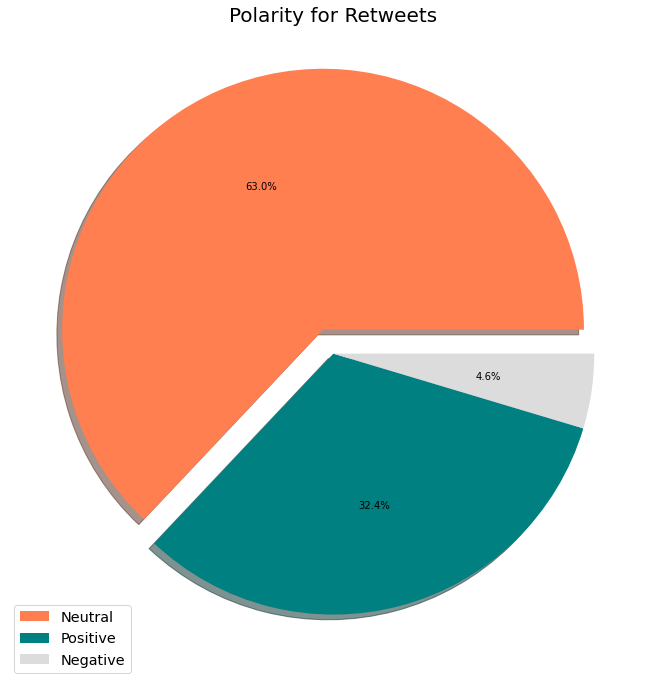

In [242]:
#make a list that holds the counts of the polarity whole
Polaritylist = ReTweetTr['Polarity Whole'].value_counts()

#visualize it in a pie chart
fig, ax = plt.subplots(figsize = (12,12))

ax.pie(Polaritylist,autopct ='%1.1f%%',colors = ['coral','teal','gainsboro'],
       explode = (0.1,0,0), shadow=True)

ax.set_title('Polarity for Retweets',fontsize = 20)
labels = ['Neutral', 'Positive','Negative']
ax.legend(labels,fontsize='x-large')


plt.show()

### If a tweet had a retweet, does that mean it has a positive polarity?

Out of the 108 tweets that were collected, it looks like 32.6% of tweets that got retweets were positive, 63.0% were nuetral and only 4.6% had a negative polarity. 

When a tweet about Radeon video cards gets a retweet, it most likely has a neutral or positive polarity.

# Extract tweets from @Radeon timeline

In [244]:
#Use tweepy to collect the tweets using the screenname 
Radtweets = twitter_api.user_timeline(screen_name='Radeon',count=200)
print('Number of tweets extracted: {}./n'.format(len(Radtweets)))

#create a data frame that holds the tweets
Radeondf = pd.DataFrame(data = [tweet.text for tweet in Radtweets], columns = ['Tweets'])
Radeondf

Number of tweets extracted: 200./n


,Tweets
0,"RT @Warcraft: It may look like 2007, but it ru..."
1,@Warcraft POV when we tap on the case. https:/...
2,RT @LisaSu: Looking forward to our keynote at ...
3,Calling all Guardians! It's the last day to en...
4,"RT @AMDGaming: The time is nigh, guerillas! Th..."
...,...
195,RT @AMDGaming: This week’s Red Rig comes court...
196,With powerful @AMD Radeon RX 5000M graphics in...
197,"Now even more incredible, @AMD Radeon #ProRend..."
198,The ultimate game changer: @AMD Radeon RX 6000...


In [245]:
#Clean the tweet from the url by calling remove_url()
Radeondf['Tweets'] = [remove_url(tweet) for tweet in Radeondf['Tweets']]
Radeondf

,Tweets
0,RT Warcraft It may look like 2007 but it runs ...
1,Warcraft POV when we tap on the case
2,RT LisaSu Looking forward to our keynote at CO...
3,Calling all Guardians Its the last day to ente...
4,RT AMDGaming The time is nigh guerillas The co...
...,...
195,RT AMDGaming This weeks Red Rig comes courtesy...
196,With powerful AMD Radeon RX 5000M graphics in ...
197,Now even more incredible AMD Radeon ProRender ...
198,The ultimate game changer AMD Radeon RX 6000 S...


In [247]:
#print the internal methods of a single tweet
print(dir(Radtweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [248]:
#add info into the dataframe
Radeondf['Len'] = np.array([len(tweet) for tweet in Radeondf['Tweets']]) #add the length of tweet to a new column
Radeondf['Likes'] = np.array([tweet.favorite_count for tweet in Radtweets]) #add the likes of the tweets
Radeondf['Retweets'] = np.array([tweet.retweet_count for tweet in Radtweets]) #add retweets
Radeondf['Date'] = np.array([tweet.created_at for tweet in Radtweets]) #add the date

#display the head 
Radeondf.head()

,Tweets,Len,Likes,Retweets,Date
0,RT Warcraft It may look like 2007 but it runs ...,101,0,237,2021-05-29 09:21:51
1,Warcraft POV when we tap on the case,36,13,0,2021-05-29 09:21:07
2,RT LisaSu Looking forward to our keynote at CO...,130,0,167,2021-05-28 22:01:21
3,Calling all Guardians Its the last day to ente...,91,32,2,2021-05-28 17:11:24
4,RT AMDGaming The time is nigh guerillas The co...,94,0,7,2021-05-28 16:40:53


In [249]:
#add the sentiment analysis score to the data frame
#adding scores to the data frame reference:https://stackoverflow.com/questions/46764674/sentiment-analysis-on-dataframe

#add the sentiment analysis of the tweet to two new columns in the dataframe
Radeondf[['Polarity','Subjectivity']] = Radeondf['Tweets'].apply(lambda Tweet: pd.Series(TextBlob(Tweet).sentiment))

Radeondf.head()

,Tweets,Len,Likes,Retweets,Date,Polarity,Subjectivity
0,RT Warcraft It may look like 2007 but it runs ...,101,0,237,2021-05-29 09:21:51,0.0,0.000000
1,Warcraft POV when we tap on the case,36,13,0,2021-05-29 09:21:07,0.0,0.000000
2,RT LisaSu Looking forward to our keynote at CO...,130,0,167,2021-05-28 22:01:21,0.0,0.000000
3,Calling all Guardians Its the last day to ente...,91,32,2,2021-05-28 17:11:24,0.0,0.066667
4,RT AMDGaming The time is nigh guerillas The co...,94,0,7,2021-05-28 16:40:53,0.0,0.000000


## Radeon user timeline Stats

In [250]:
Radeondf.describe()

,Len,Likes,Retweets,Polarity,Subjectivity
count,200.000000,200.000000,200.00000,200.000000,200.000000
mean,104.470000,158.925000,77.38500,0.229396,0.485452
std,32.564109,287.014277,288.08492,0.314525,0.311766
min,0.000000,0.000000,0.00000,-1.000000,0.000000
25%,102.750000,0.000000,8.00000,0.000000,0.300000
50%,112.000000,30.000000,20.00000,0.211688,0.498636
75%,130.000000,224.500000,44.25000,0.436364,0.700379
max,136.000000,1931.000000,3614.00000,1.000000,1.000000


Max value = 3614

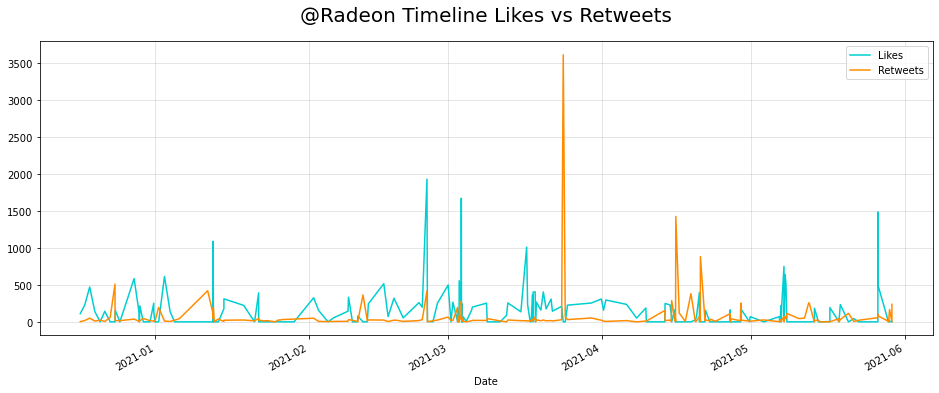

In [251]:
#create a series for the likes and retweets
Radlikes = pd.Series(Radeondf['Likes'].values, index =Radeondf['Date'])
RadRetw = pd.Series(Radeondf['Retweets'].values, index = Radeondf['Date'])

"""       Plot        """
#plot the retweets and likes
Radlikes.plot(figsize= (16,6), label = 'Likes', legend = True, color='darkturquoise')
RadRetw.plot(figsize = (16,6), label = 'Retweets', legend = True, color = 'darkorange')
plt.title('@Radeon Timeline Likes vs Retweets',fontsize = 20, pad = 20)
plt.grid(color= 'black',linestyle = '-',linewidth = .5,alpha=.2)
plt.show()

We can see how the amount of retweets compare to likes. The likes of tweets seem to be a lot more volatile than the retweets. 

It also looks like there is one tweet that is an outlier with 3614 retweets. This number definitely skewed the average for retweets.

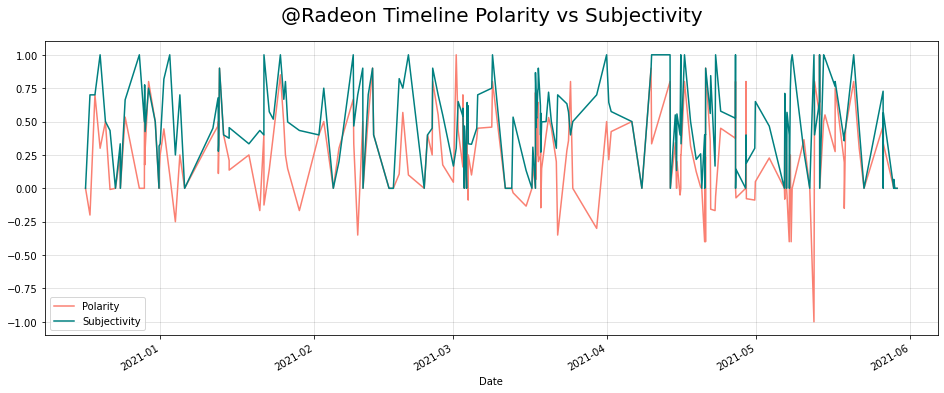

In [252]:
#create a pandas series to hold the polarity and data values
Radpolarity =  pd.Series(Radeondf['Polarity'].values, index = Radeondf['Date'])
RadSub = pd.Series(Radeondf['Subjectivity'].values, index = Radeondf['Date'])

#plot the polarity and subjectivity
Radpolarity.plot(figsize = (16,6), label = 'Polarity',legend = True, color ='salmon')
RadSub.plot(figsize = (16,6), label = 'Subjectivity', legend = True, color ='teal')
plt.title('@Radeon Timeline Polarity vs Subjectivity', fontsize = 20,pad = 20)
plt.grid(color= 'black',linestyle = '-',linewidth = .5,alpha=.2)
plt.show()

The subjectivity of the tweets seems to stay positive or neutral. There seem to be some negative polarity tweets but they seem to be positive for the most part.

In [253]:
# We construct lists with classified tweets:
pos_Rad = [ tweet for index, tweet in enumerate(Radeondf['Tweets']) if Radeondf['Polarity'][index] > 0]
neu_Rad = [ tweet for index, tweet in enumerate(Radeondf['Tweets']) if Radeondf['Polarity'][index] == 0]
neg_Rad = [ tweet for index, tweet in enumerate(Radeondf['Tweets']) if Radeondf['Polarity'][index] < 0]

# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_Rad)*100/len(Radeondf['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_Rad)*100/len(Radeondf['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_Rad)*100/len(Radeondf['Tweets'])))

Percentage of positive tweets: 64.5%
Percentage of neutral tweets: 21.0%
Percentage de negative tweets: 14.5%
